<a href="https://colab.research.google.com/github/kknd4eva/binary_classification/blob/main/notebooks/data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data wrangling
[Kaggle dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

In [47]:
%pip install pandasql

import pandas as pd
import numpy as np 
import math 
from scipy import stats
from pandasql import sqldf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
df = pd.read_csv("/content/cardio_train.csv", sep=';')

# Let's see age in years not days. df['a'] = df['a'].apply(lambda x: x + 1)
df['age'] = df['age'].apply(lambda x: x / 365)

df.head() # check our output

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


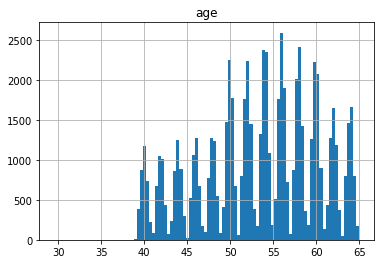

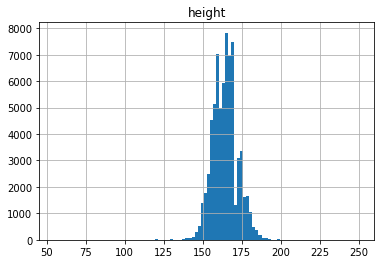

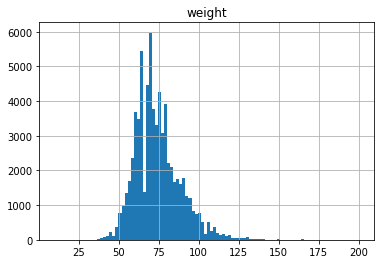

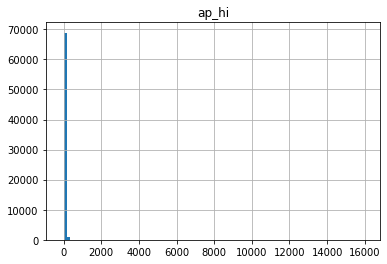

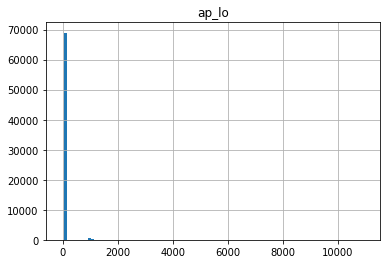

In [49]:
df.describe()
# Create histogram
hist = df.hist(column=['age'], bins=100)
hist = df.hist(column=['height'], bins=100)
hist = df.hist(column=['weight'], bins=100)
hist = df.hist(column=['ap_hi'], bins=100)
hist = df.hist(column=['ap_lo'], bins=100)

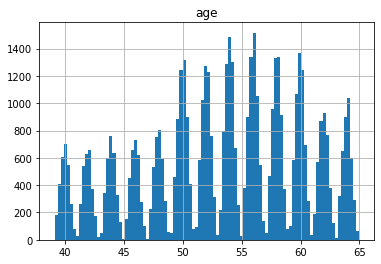

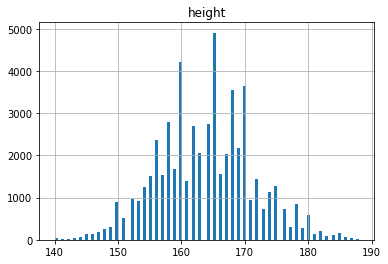

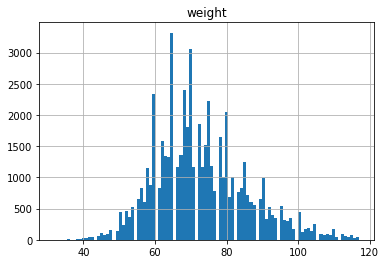

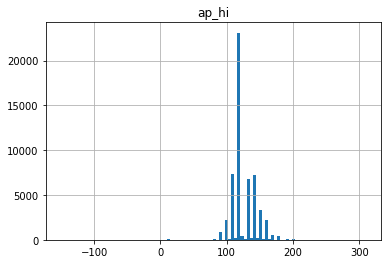

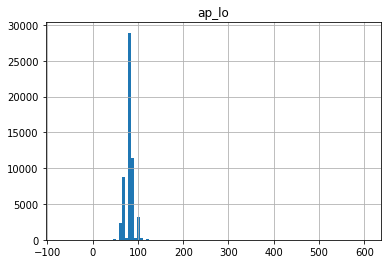

In [51]:
# create copy of dataframe with outliers removed. We'll only want to bring some columns back to our original df
dfz = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

df['age'] = dfz['age']
df['height'] = dfz['height']
df['weight'] = dfz['weight']
df['ap_hi'] = dfz['ap_hi']
df['ap_lo'] = dfz['ap_lo']

# Create histogram
hist = df.hist(column=['age'], bins=100)
hist = df.hist(column=['height'], bins=100)
hist = df.hist(column=['weight'], bins=100)
hist = df.hist(column=['ap_hi'], bins=100)
hist = df.hist(column=['ap_lo'], bins=100)


In [52]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,55699.000000,70000.000000,55699.000000,55699.000000,55699.000000,55699.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.255880,1.349571,163.892476,72.919929,125.643656,81.011077,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.769454,0.476838,7.566255,13.016990,17.752886,10.207992,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,39.128767,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.282192,1.000000,158.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.917808,1.000000,164.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.378082,2.000000,169.000000,80.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,188.000000,117.000000,309.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
output = sqldf("select distinct(alco) from df")
print(output)
# Looks like our removing of outliers took out our smoke and alco values. Maybe we'll limit the outlier removal to columns with ranges. 
